In [1]:
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import mysql # Para ver la versión
import mysql.connector
import pymysql


Mostrar los valores de temperatura de un año usando un histograma,
diferenciando los valores atípicos para ese año. Para calcular los outliers se puede
usar el Z-Score, Tukey’s Fence o DBSCAN.

In [3]:
query = f"""SELECT 
tmed,
fecha
FROM 
    valores_climatologicos"""

In [4]:
database = "AEMET"

db = mysql.connector.connect( host = "localhost",
                          user = "root",
                          password = "nueva_contraseña",
                          database = database)

cursor = db.cursor()

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data)

cursor.close()
db.close()

In [5]:
df.rename(columns = {0 : "temperatura",
                    1 : "fecha"}, inplace=True)

In [6]:
df["fecha"] = pd.to_datetime(df["fecha"])
df1 = df[df["fecha"].dt.year == 2022]
df2 = df[df["fecha"].dt.year == 2023]
df3 = df[df["fecha"].dt.year == 2024]

In [7]:
def hist_temp_outliers(df, año):
    Q1 = df["temperatura"].quantile(0.25)
    Q3 = df["temperatura"].quantile(0.75)
    IQR = Q3 -Q1

    valla_inf = Q1 - 1.5 * IQR
    valla_sup = Q3 + 1.5 * IQR
    
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(df['temperatura'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

    # Agregar líneas verticales para Q1, Q3 y las vallas
    plt.axvline(Q1, color='orange', linestyle='--', linewidth=2, label='Q1 (25%)')
    plt.axvline(Q3, color='green', linestyle='--', linewidth=2, label='Q3 (75%)')
    plt.axvline(valla_inf, color='red', linestyle='--', linewidth=2, label='Límite Inferior (Outliers)')
    plt.axvline(valla_sup, color='red', linestyle='--', linewidth=2, label='Límite Superior (Outliers)')

    # Configurar el título y etiquetas
    plt.title(f'Histograma de Temperaturas del {año}', fontsize=16)
    plt.xlabel('Temperatura', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)  # Agregar la leyenda
    plt.show()

    # Imprimir información adicional (opcional)
    print(f"Valla inferior: {valla_inf:.2f}, Valla superior: {valla_sup:.2f}")
    print(f"Q1 (25%): {Q1:.2f}, Q3 (75%): {Q3:.2f}")

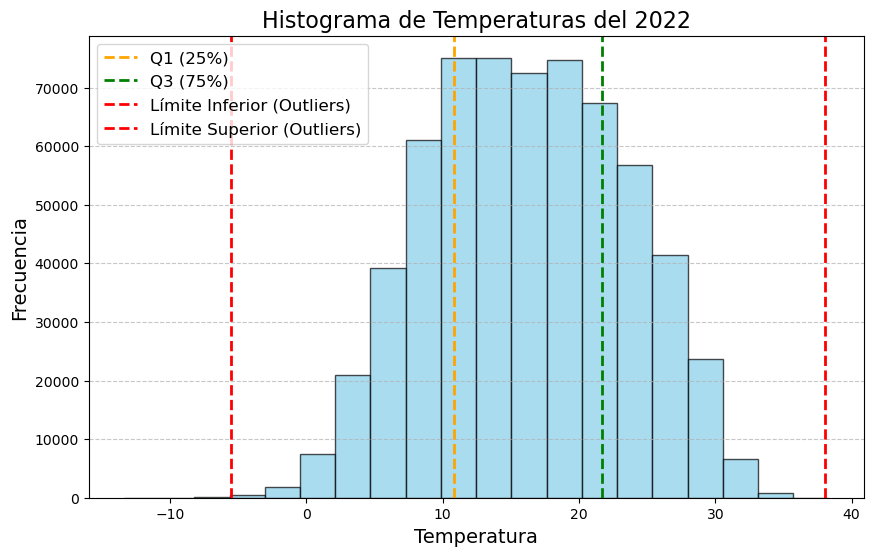

Valla inferior: -5.55, Valla superior: 38.05
Q1 (25%): 10.80, Q3 (75%): 21.70


In [8]:
hist_temp_outliers(df1,2022)

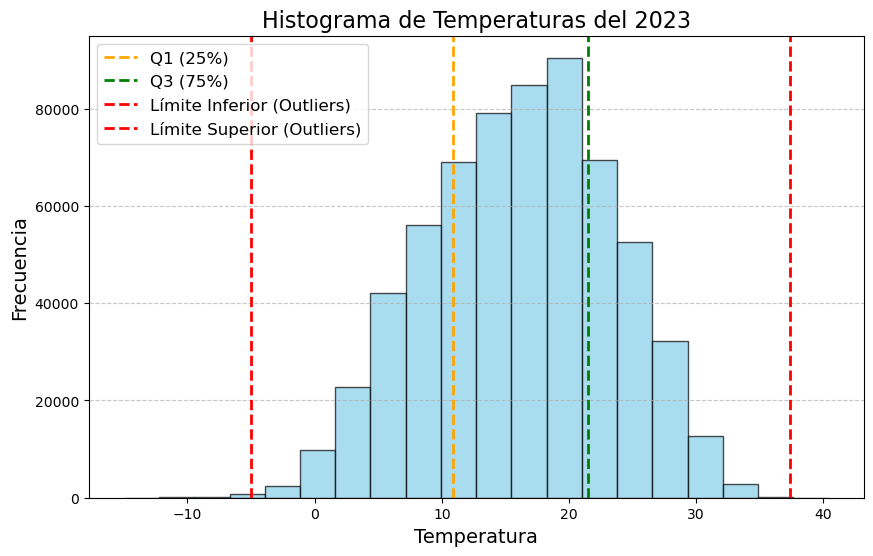

Valla inferior: -5.00, Valla superior: 37.40
Q1 (25%): 10.90, Q3 (75%): 21.50


In [9]:
hist_temp_outliers(df2,2023)

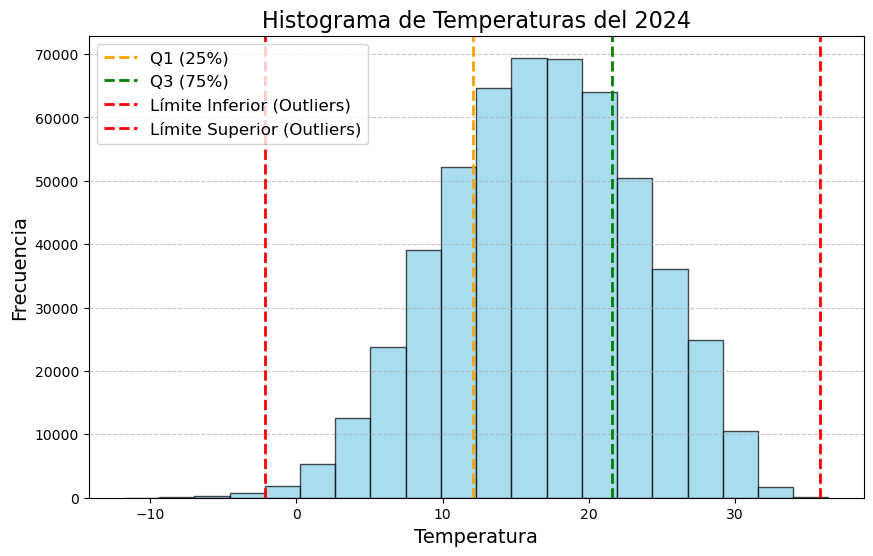

Valla inferior: -2.15, Valla superior: 35.85
Q1 (25%): 12.10, Q3 (75%): 21.60


In [10]:
hist_temp_outliers(df3,2024)